<a href="https://colab.research.google.com/github/stelmanj/MusicAndLanguage/blob/master/Audio_Features_and_Lyric_Spread_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is kind of a spin-off of the investigation done in "A Brief Analysis of Lyric Metrics." We take the same 100-song sample used in that study. The question we examine here is how do the songs from widely spoken languages vary in comparison to songs from non-widely spoken languages? 

In this chapter, I'll look at the spreads of a few audio and lyric features from 100 songs in 5 different languages (20 songs written in each language). I want to know if languages spoken across a wider geographical area produce a wider range of patterns in audio features and song lyrics. In other words, do the songs written by, say, Spanish-speaking artists vary more than songs written by, say, Indonesian-speaking artists? less? 

The following two languages make up the *widely spoken* group:

* English (en)

* Spanish (es)

The following three languages make up the *not widely spoken* group:

* Indonesian (id)

* Dutch (nl)

* Swahili (sw)

The distinction between the first and second groups is decided by whether a language is an official national language on at least three continents. 

I've used the Spotify Web API and the natural language processing package $\verb|quanteda|$ to calculate the following audio/ lyric features for audio and first few lines of lyrics in each of the 100 sampled songs. (20 songs were randomly sampled from each of the 5 languages.)

* Danceability (number between 0 and 1)

* Energy (number between 0 and 1)

* Key (category represented as a number between 0 and 11)*

* Loudness (number between -25 and 0)

* Speechiness (number between 0 and 1)

* Acousticness (number between 0 and 1)

* Valence (number between 0 and 1)**

* Tempo (number between 50 and 250)

* Type/Token Ratio, or TTR --> (# distinct words / # total words) in the first few lines of lyrics

*Each of the 12 numbers corresponds to one of the 12 keys on the chromatic scale, (e.g.  C, C\#, D, ..., A, A\#, B).

**I'm not entirely sure how Spotify measures valence, but I have the understanding that is an overall measure of how "happy" a song decidedly is based on other features.


Let's load in the data frames we made in DataPreparation.

In [0]:
esinw_df <- read.csv(
  "https://github.com/stelmanj/MusicAndLanguage/blob/master/AFS_esinw.csv?raw=true",
  row.names = 1, stringsAsFactors = FALSE) 

Let's make sure it looks right.

In [3]:
head(esinw_df)

,sid,danceability,energy,key,loudness,speechiness,acousticness,valence,tempo,lang,Types,Tokens,TTR
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
1,5pz1Q9QFHWsUBZiJ73Jx3j,0.579,0.815,10,-7.603,0.0332,0.1000,0.556,155.577,nl,95,188,0.5053191
2,6eVj2ARRKQiy2Gb9Za7jnf,0.701,0.866,9,-4.632,0.0298,0.0535,0.933,119.949,nl,63,140,0.4500000
3,38Y0M7Cntq31Co4AttUwgE,0.540,0.662,6,-6.340,0.0559,0.3500,0.749,187.939,nl,68,111,0.6126126
4,5uswrfRMA6MpRICWXEE1Uq,0.631,0.921,9,-3.248,0.0447,0.1380,0.370,108.055,nl,66,114,0.5789474
5,2ef2rQVgykMmHX47tjecDp,0.542,0.704,1,-7.953,0.0364,0.0215,0.253,119.942,nl,45,87,0.5172414
6,23lfdALTPtgNbJrzhRnfks,0.469,0.603,10,-8.358,0.0333,0.0893,0.231,131.739,nl,58,133,0.4360902


# EDA

### Density plots

The plots below show the density curves, with each color-coded by language. For every measure besides Key, the density curves show us something about center, shape, and spread of their distributions among the songs of each language. 

Because key is actually a categorical variable, and not a quantitative variable, I used a different type of density plot for Key. Each key on the chromatic scale is associated with a certain value, 0-11, featured on the x-axis. The darker the shading at a value of x, the more songs written in the key associated with that x-value turned up in the sample. The idea is not to look for similarities in the locations of dark and light shading, but rather to compare and contrast the distribution of pigmentation across whole strips. This helps us get a better look at spread, which is all we are interested in, as shape and center don't have the same kind of meaning when dealing with a categorical variable as with quantitative variables.


In [0]:
#install.packages("ggridges")

In [0]:
library(tidyverse)
library(ggridges)

In [0]:
# we don't need cols 1, 11 & 12 (sid, Types & Tokens)
esinw_df2 <- lapply(c(2:9,13), function(x){  
  cbind(
    # each has three columns: the measure's value, the language, and the measure's name
    esinw_df[,c(x,10)], measure = names(esinw_df[x])) %>%
    # and rename the measure's value column as "value" so we can rbind all of the dfs later
    dplyr::rename(value = names(esinw_df[x]))
})

# now rbind them
esinw_df3 = esinw_df2[[1]]
for (i in c(2:9)){
  esinw_df3 <- rbind(esinw_df3,esinw_df2[[i]])
}

# and take out the trash
rm(esinw_df2)


Picking joint bandwidth of 0.0652

Picking joint bandwidth of 0.0764

Picking joint bandwidth of NaN

Warning message in min(data$x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(data$x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Picking joint bandwidth of 1.25

Picking joint bandwidth of 0.0193

Picking joint bandwidth of 0.122

Picking joint bandwidth of 0.106

Picking joint bandwidth of 12.9

Picking joint bandwidth of 0.044

Warning message in FUN(X[[i]], ...):
“no non-missing arguments to max; returning -Inf”


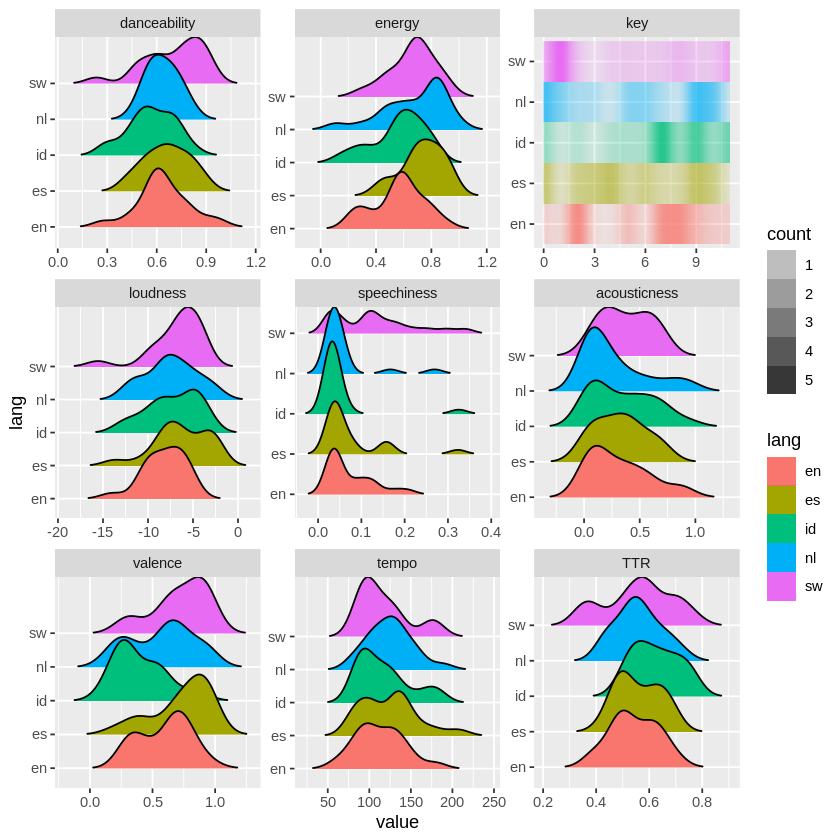

In [36]:
# GG Ridge Plot

# make a ggplot and facet it by language
f1 <- ggplot(esinw_df3, aes(x = value, y = lang, fill = lang)) + 
  facet_wrap(measure~. , ncol = 3, scales = 'free')
# add some density plots to it to it for teh numical metric
f2 <- f1 + geom_density_ridges_gradient(data = subset(esinw_df3,measure!='key'),
                               scale = 1.8, rel_min_height = 0.01)
# add some gradient for the key (categorical) metric
f3 <- f2 +   stat_density(data = subset(esinw_df3,measure=='key'), 
                          aes(alpha = stat(count)),
               geom = "raster", position = "identity", bw = 1/2)
f3

In the Key plot (top right), the pink strip seems to be the splotchiest-looking. This means that there appears to be less variation of song key among songs written in English than among songs written in other languages. 

It would seem that the distributions of many features of English (pink) and Spanish (olive) music have similar shapes (danceability, loudness, speechiness, acousticness, tempo, and TTR). For all of these but loudness, these distributions seem to have commonalities not just of shape, but also of center and spread (ignoring abnormal tail behavior). 

Swahili's distribution (purple) always tends to march to the beat of its own drum (terrible pun intended). Truthfully though, if you look at all nine of the plots, there doesn't seem to be one in which the purple curve (or strip) seems to mimic the distribution of another color. 

What's interesting about Indonesian music (teal) is that acousticness is basically its only bimodally distributed feature. All its other features are distributed pretty unimodally, which is unusual. Meanwhile, every other language's music has at least two features that are distributed bimodally. 

All in all, there doesn't seem to be a super clear unifying difference between the more widely-spoken and less widely-spoken languages.

### Box plots

The boxplots below show the five-number-summaries and outliers for all of the same data that was used in the density curves above. Key, the categorical feature, is portrayed in a violin plot instead of a boxplot so that it is easier to see the concentrations at individual values of key.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



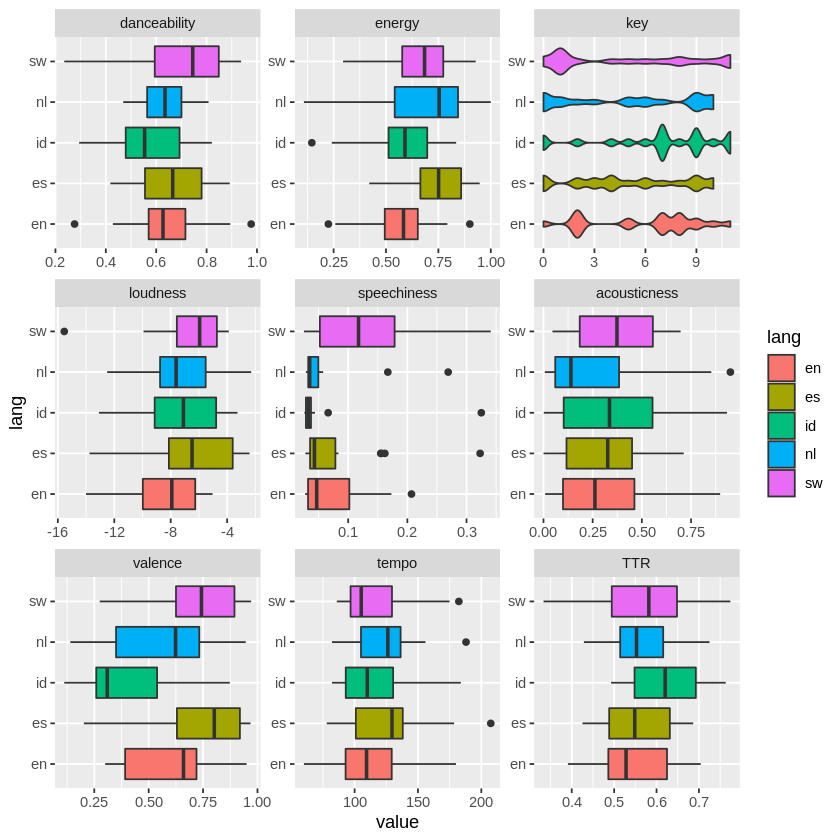

In [21]:
# boxplots
# make the setup
f1 <- ggplot(esinw_df3, aes(y = value, x = lang, fill = lang))+ 
  facet_wrap(measure~. , ncol = 3, scales = 'free')
# boxplots for the true numeric variables
f2 <- f1+geom_boxplot(data = subset(esinw_df3, measure!='key')) + 
  coord_flip()
# violin plot for key (the categorical variable in disguise)
f3 <- f2+geom_violin(adjust = 1/5, data = subset(esinw_df3,measure=='key')) +
  coord_flip()
f3

There are lots of outliers in speechiness, which, while prominent in the density curves, is even more prominent here, especially for Indonesian. 

There don't seem to be any consistent patterns. As far as what these plots portray, there is no clear relationship between song feature distribution characteristics and widespokenness. 

# Methods

We want to know whether or not there is a difference between extent of variation within the music of more widely spoken languages vs music of less widely spoken languages. We're going to approach exploring this in two ways. 

* Running a statistical hypothesis test

* Performing K-means clustering

### Rank Sum tests

Rank Sum tests are usually not used in the way I am using them here. The Wilcoxon Rank Sum test is designed to be run on a data set whose observations are all in the same units. In order to deal with this restriction, I have to take some intermediate steps. 

I'll first calculate the spread metric (standard deviation or IQR) for each of the nine features for each of the 5 languages (5 * 9 = 45 calculations). Second, within each of the nine features separately, I'll perform ranking on the spread metric. Third, I'll pool together those *ranks* (each will be a value 1-5) to form the set of "observations" on which the Wilcoxon Rank Sum Test will be performed. I'll be giving each one of the 45 "observations" a label specifying which of the two contributing "populations" (widely spoken/ not widely spoken) it pertains to. During the Rank Sum test, each one will get a new overall rank based on where it falls relative to the rest of the "observations". 

Those "observations" originating from data of English or Spanish music pertain to the **widely spoken** "population", and those "observations" originating from data of Indonesian, Dutch, or Swahili music pertain to the **not widely spoken** "population."

### Kmeans Clustering

Unlike the Wilcoxon Rank Sum test, Kmeans, a clustering method, is built to handle feature-rich data. However, it is not built for computing how much evidence exists in favor of the clustering formation hypothesized. It only determines which of all the possible clustering formations has the most evidence in favor of it. Therefore I will take some additional steps to interpret the results of Kmeans as I would the outcome of a statistical test.

# Results

### Rank Sum tests

We'll perform two Wilcoxon Rank Sum tests. To start, we will use standard deviation as a metric of spread. Following that, we will repeat the same process but with IQR as our spread metric.

In [0]:
# before anything else, we'll have to take some special measures to treat the key variable as categorical instead of numeric.

# turn the 0-11 key variable into 12 bernoulli variables with 20 observations each
dummies <- esinw_df[order(esinw_df$lang),] %>% select(key) 

# and its levels should be saved as separate lists
dum.levels <- levels(factor(unlist(dummies)))
key <- lapply(dummies, 
              function(x) table(sequence(nrow(dummies)), factor(x, levels = dum.levels)))$key

In [28]:
# Now, instead of this
head(dummies)

,key
,<int>
21,11
41,10
42,8
44,8
51,7
52,2


In [24]:
# we have this 
head(key)

   
    0 1 2 3 4 5 6 7 8 9 10 11
  1 0 0 0 0 0 0 0 0 0 0  0  1
  2 0 0 0 0 0 0 0 0 0 0  1  0
  3 0 0 0 0 0 0 0 0 1 0  0  0
  4 0 0 0 0 0 0 0 0 1 0  0  0
  5 0 0 0 0 0 0 0 1 0 0  0  0
  6 0 0 1 0 0 0 0 0 0 0  0  0

#### Standard Deviation Rank Sum test

The first of the following tables contains the standard deviation of each feature for each individual language. The second table replaces the standard deviations with their ranks. 

Step 1: Calculate the standard deviation for each of the nine features for each of the five individual languages.


In [34]:
# Rank sum test of standard deviations
# 1. make the matrix of "data"

# add a column for widespokenness to the "data" matrix of standard deviations
sds <- esinw_df %>% select(-sid, -Tokens, -Types) %>%
  group_by(lang) %>% summarise_all(sd) %>% ungroup() %>%
  mutate(is_widely_spoken = ifelse(lang %in% c('en','es'), T, F))

# use a different method for key, as it's a not actually a numeric variable.
# for each language, make a binary vector for each of the 12 possible values, 
## with 1s in all places where key = key[i], and 0s elsewhere
## take the sd of each of those 5 vectors, and then take the mean of those 5 sds
key_sds <- sapply(0:4,function(c){
  stdevskeys = c()
  for (i in 1:12){
    stdevskeys = append(stdevskeys,
                        sd(key[(c*(20) + (1:20)),i]))}
  mean(stdevskeys)}) 

# store that in the key column of the standard devation data frame
sds$key <- key_sds

# show the standard deviations
sds %>% 
  mutate(`widely spoken?` = ifelse(is_widely_spoken, "yes", "no")) %>%
  select(-is_widely_spoken)

lang,danceability,energy,key,loudness,speechiness,acousticness,valence,tempo,TTR,widely spoken?
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
en,0.15810033,0.1849246,0.2126210,2.240599,0.05285669,0.2701929,0.1995413,29.24683,0.08825985,yes
es,0.13614752,0.1498921,0.2500864,3.010983,0.07301962,0.2226005,0.2290122,33.85538,0.08079621,yes
id,0.14129308,0.1902284,0.2392029,2.886717,0.06562978,0.2804922,0.2006185,31.35332,0.08500872,no
nl,0.09147348,0.2283689,0.2317776,2.853917,0.05834851,0.2897099,0.2525728,26.27365,0.08347406,no
sw,0.18131418,0.1611031,0.2514454,2.757931,0.09217738,0.2135975,0.2167221,29.91303,0.12760072,no
